# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [78]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [79]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [80]:
y, X = patsy.dmatrices('tip ~ sex + smoker + C(time) + net_bill + 1', tips)

In [81]:
modelo1 = sm.OLS(y,X).fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           2.64e-20
Time:                        19:47:15   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]        -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]          0.1405      0.151      0.932      0.352      -0.156       0.437
C(time)[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill              0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h4 style="color:green">Podemos remover a variável que indica o sexo, pois já foi comprovado que ela não tem muita significância para o treinamento do modelo. Também é possível observar que outras variáveis apresentam valores de P>t bem maiores que 5%, nesse caso eu fiquei em dúvida, seria melhor mantermos eles no modelo? pois se removermos eles, só ficaríamos com a variável net_bill para as explicativas. Em um cenário real poderíamos remover tantas variáveis "não significativas" assim?</h4>

In [82]:
y, X = patsy.dmatrices('tip ~ smoker + C(time) + net_bill + 1', tips)

In [83]:
modelo2 = sm.OLS(y,X).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     40.35
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           3.79e-21
Time:                        19:47:15   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             758.3
Df Residuals:                     240   BIC:                             772.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1978      0.221      5.412      0.000       0.762       1.634
smoker[T.No]          0.1405      0.150      0.934      0.351      -0.156       0.437
C(time)[T.Dinner]     0.0591      0.165      0.358      0.721      -0.266       0.384
net_bill              0.0995      0.009     10.756      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.578   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.011
Skew:                           0.801   Prob(JB):                     4.63e-15
Kurtosis:                       4.982   Cond. No.                         64.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
tips['resid'] = modelo2.resid

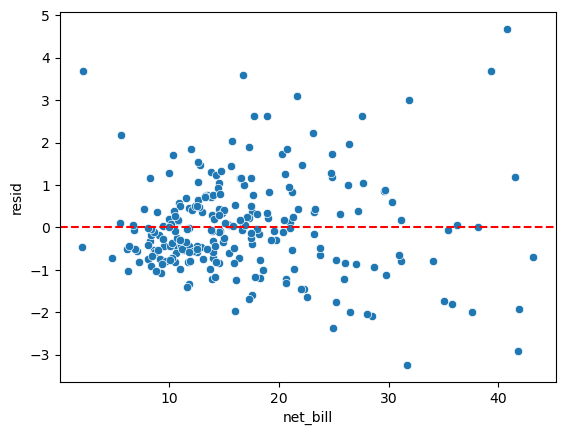

In [85]:
sns.scatterplot(x = 'net_bill', y = 'resid', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

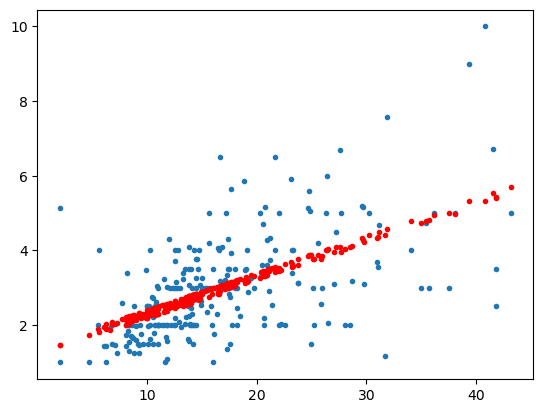

In [86]:
tips['pred'] = modelo1.fittedvalues

plt.plot(tips['net_bill'], tips['tip'], '.')
plt.plot(tips['net_bill'], tips['pred'], 'r.')

<h4 style="color:green">net_bill em log</h4>

In [87]:
y, X = patsy.dmatrices('tip ~ smoker + C(time) + np.log(net_bill) + 1', tips)

In [88]:
modelo3 = sm.OLS(y,X).fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     33.55
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           3.79e-18
Time:                        19:47:15   Log-Likelihood:                -382.22
No. Observations:                 244   AIC:                             772.4
Df Residuals:                     240   BIC:                             786.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.3169      0.449     -2.934      0.004      -2.201      -0.433
smoker[T.No]          0.0473      0.154      0.307      0.759      -0.257       0.351
C(time)[T.Dinner]     0.0897      0.170      0.529      0.598      -0.244       0.424
np.log(net_bill)      1.5568      0.159      9.779      0.000       1.243       1.870
==============================================================================
Omnibus:                       73.761   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.095
Skew:                           1.300   Prob(JB):                     1.61e-48
Kurtosis:                       6.858   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
tips['resid_log'] = modelo3.resid

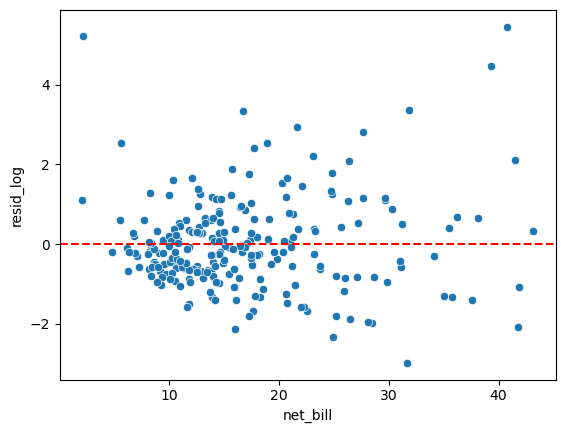

In [90]:
sns.scatterplot(x = 'net_bill', y = 'resid_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

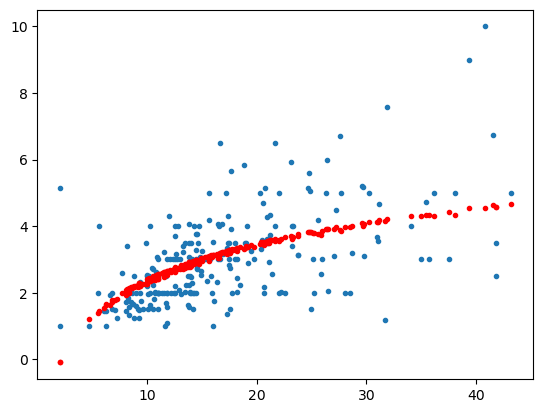

In [91]:
tips['pred_log'] = modelo3.fittedvalues

plt.plot(tips['net_bill'], tips['tip'], '.')
plt.plot(tips['net_bill'], tips['pred_log'], 'r.')

<h4 style="color:green">net_bill em polinômio</h4>

In [92]:
y, X = patsy.dmatrices('tip ~ smoker + C(time) + np.power(net_bill, 2) + 1', tips)

In [93]:
modelo4 = sm.OLS(y,X).fit()
modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     35.19
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           6.95e-19
Time:                        19:47:15   Log-Likelihood:                -380.48
No. Observations:                 244   AIC:                             769.0
Df Residuals:                     240   BIC:                             782.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.0681      0.185     11.152      0.000       1.703       2.433
smoker[T.No]              0.1733      0.154      1.124      0.262      -0.130       0.477
C(time)[T.Dinner]         0.1101      0.168      0.655      0.513      -0.221       0.441
np.power(net_bill, 2)     0.0021      0.000     10.023      0.000       0.002       0.003
==============================================================================
Omnibus:                       24.885   Durbin-Watson:                   2.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.017
Skew:                           0.661   Prob(JB):                     2.49e-08
Kurtosis:                       4.303   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
tips['resid_pol'] = modelo4.resid

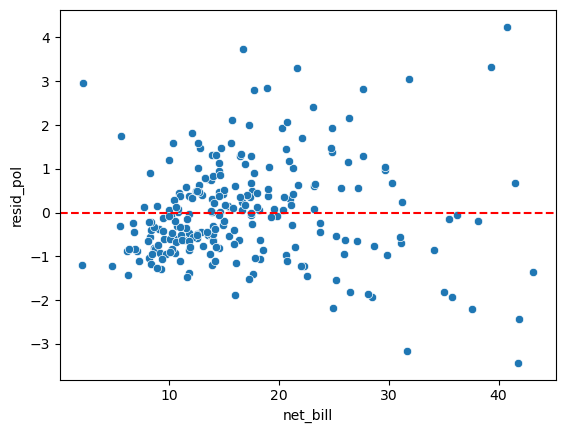

In [95]:
sns.scatterplot(x = 'net_bill', y = 'resid_pol', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

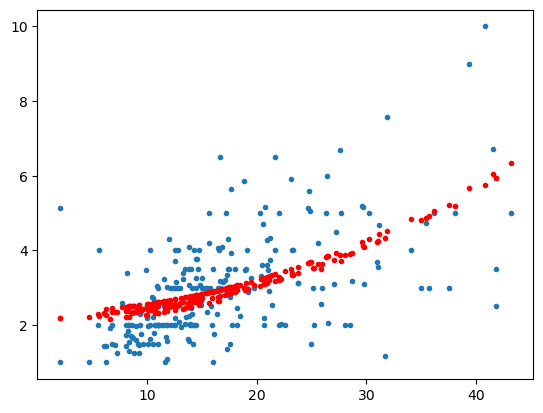

In [96]:
tips['pred_pol'] = modelo4.fittedvalues

plt.plot(tips['net_bill'], tips['tip'], '.')
plt.plot(tips['net_bill'], tips['pred_pol'], 'r.')

<h4 style="color:green">Comparando os modelos, ao meu ver, o modelo1 apresenta o melhor comportamento, pois, além de possuir o maior valor para R quadrado, ele parece ter uma linha de regressão mais coerente com os valores "reais". Na prática, a diferença entre os modelos é mínima e os resíduos praticamente não se alteraram</h4>

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

<h4 style="color:green">As comparações ficaram as seguintes:</h4>
<h4 style="color:green">Modelo2 (modelo do item 1): R^2 = 0.335</h4>
<h4 style="color:green">Modelo3 (modelo com o log): R^2 = 0.335</h4>
<h4 style="color:green">Modelo4 (modelo com o polinômio): R^2 = 0.305</h4>
<h4 style="color:green">Portanto, me parece que o último modelo apresenta um desempenho ligeiramente pior que os primeiros</h4>

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

<h4 style="color:green"></h4>

In [150]:
df = pd.read_csv('previsao_de_renda.csv')
renda = df.head(500)
renda = renda.dropna()

<Axes: xlabel='tempo_emprego', ylabel='renda'>

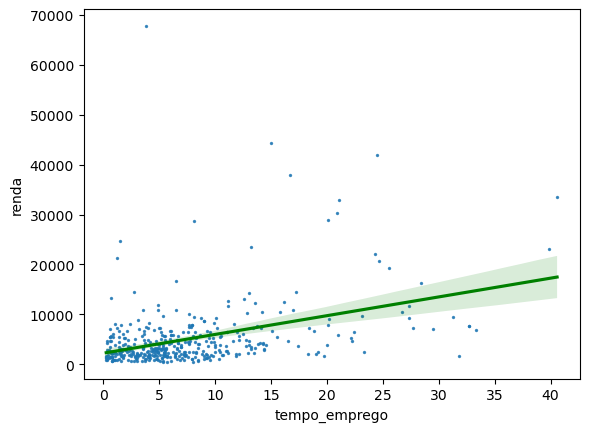

In [151]:
sns.regplot(y = 'renda', x = 'tempo_emprego', data = renda, scatter_kws={'s': 2}, line_kws={'color': 'green'})

In [152]:
reg1 = smf.ols('renda ~ tempo_emprego', data = renda).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     77.98
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           2.91e-17
Time:                        21:10:18   Log-Likelihood:                -4232.3
No. Observations:                 419   AIC:                             8469.
Df Residuals:                     417   BIC:                             8477.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2222.4279    430.850      5.158      0.000    1375.519    3069.336
tempo_emprego   375.9647     42.575      8.831      0.000     292.277     459.652
==============================================================================
Omnibus:                      468.323   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29778.364
Skew:                           5.020   Prob(JB):                         0.00
Kurtosis:                      43.061   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

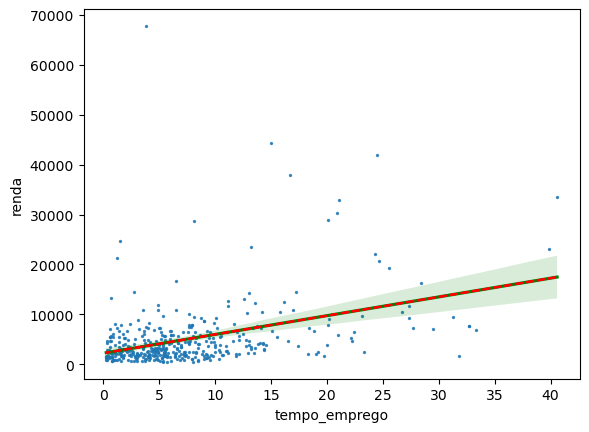

In [153]:
sns.regplot(y = 'renda', x = 'tempo_emprego', data = renda, scatter_kws={'s': 2}, line_kws={'color': 'green'})
plt.plot(renda['tempo_emprego'], reg1.fittedvalues, 'r--')

In [154]:
renda['resid'] = reg1.resid

<h4 style="color:green">Ajustando um gráfico para mostrar o resíduo do modelo</h4>

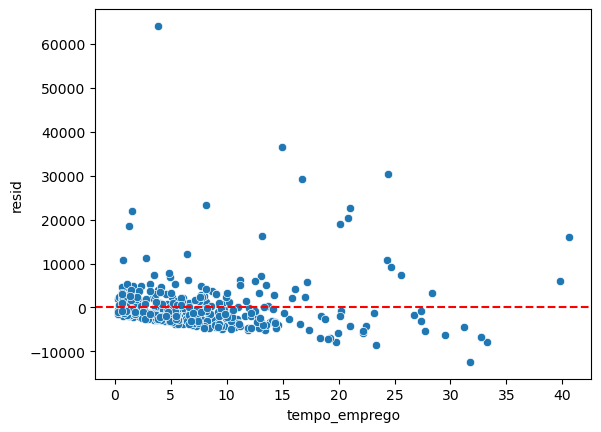

In [155]:
sns.scatterplot(x = 'tempo_emprego', y = 'resid', data = renda)
plt.axhline(y=0, color='r', linestyle='--')

<h4 style="color:green">Testando com o log da variável y</h4>

In [160]:
reg_log = smf.ols('np.log(renda) ~ tempo_emprego', data = renda).fit()
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     100.6
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           2.35e-21
Time:                        21:22:35   Log-Likelihood:                -478.26
No. Observations:                 419   AIC:                             960.5
Df Residuals:                     417   BIC:                             968.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.7106      0.055    139.260      0.000       7.602       7.819
tempo_emprego     0.0549      0.005     10.031      0.000       0.044       0.066
==============================================================================
Omnibus:                       10.764   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.195
Skew:                           0.297   Prob(JB):                      0.00225
Kurtosis:                       3.589   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

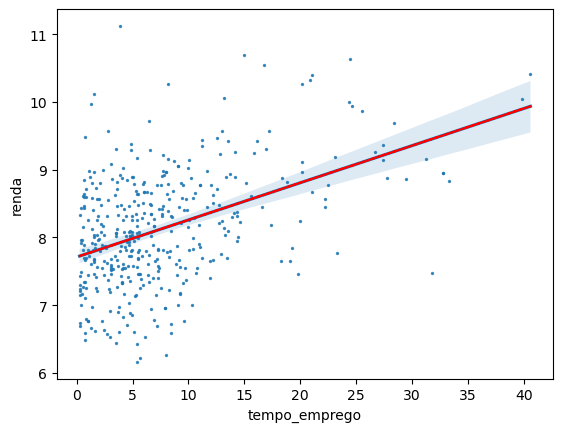

In [166]:
sns.regplot(y=np.log(renda['renda']), x = renda['tempo_emprego'], scatter_kws={'s': 2})
plt.plot(renda['tempo_emprego'], reg_log.fittedvalues, 'r--')

In [169]:
renda['resid_log'] = reg_log.resid

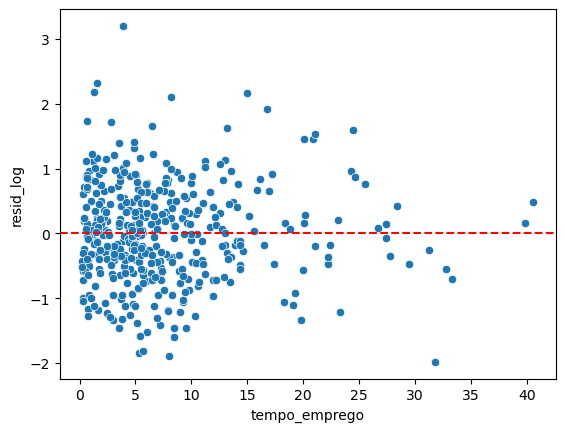

In [170]:
sns.scatterplot(x = 'tempo_emprego', y = 'resid_log', data = renda)
plt.axhline(y=0, color='r', linestyle='--')

<h4 style="color:green">Testando com o polinômio da variável explicativa</h4>

In [190]:
reg_pol = smf.ols('renda ~ np.power(2, tempo_emprego)', data = renda).fit()
reg_pol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     29.70
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           8.65e-08
Time:                        21:57:08   Log-Likelihood:                -4253.8
No. Observations:                 419   AIC:                             8512.
Df Residuals:                     417   BIC:                             8520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   4933.9136    304.628     16.197      0.000    4335.116    5532.712
np.power(2, tempo_emprego)  1.783e-08   3.27e-09      5.450      0.000    1.14e-08    2.43e-08
==============================================================================
Omnibus:                      458.030   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22601.109
Skew:                           4.952   Prob(JB):                         0.00
Kurtosis:                      37.590   Cond. No.                     9.33e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

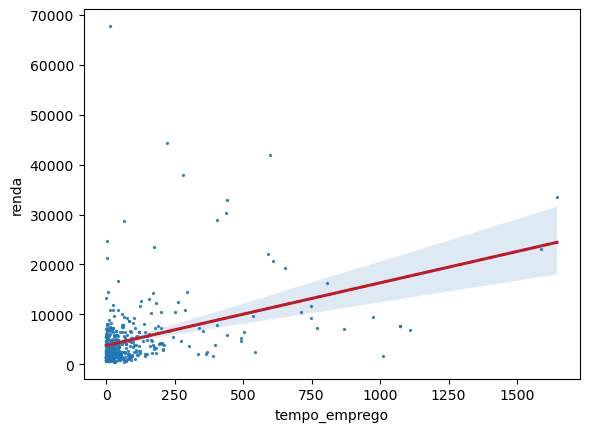

In [187]:
sns.regplot(y=renda['renda']), x = np.power(renda['tempo_emprego'], 2), scatter_kws={'s': 2})
plt.plot(np.power(renda['tempo_emprego'], 2), reg_pol.fittedvalues, 'r--')

In [188]:
renda['resid_pol'] = reg_pol.resid

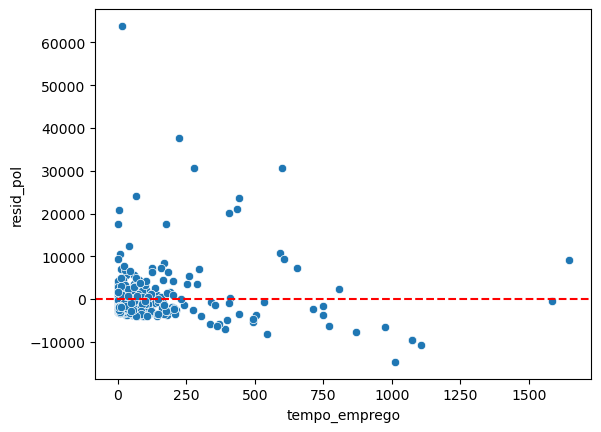

In [189]:
sns.scatterplot(x = np.power(renda['tempo_emprego'], 2), y = renda['resid_pol'])
plt.axhline(y=0, color='r', linestyle='--')

<h4 style="color:green">Nesse caso, parece que o reg_log apresentou os residuos mais distribuídos até o momento</h4>

In [193]:
y, X = patsy.dmatrices(
    'renda ~ sexo + posse_de_imovel + posse_de_veiculo + qtd_filhos + tipo_renda + educacao + C(estado_civil) + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + 1', 
    renda)

In [194]:
modelo_renda_multi = sm.OLS(y,X).fit()
modelo_renda_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     5.937
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           9.65e-14
Time:                        22:06:57   Log-Likelihood:                -4213.5
No. Observations:                 419   AIC:                             8469.
Df Residuals:                     398   BIC:                             8554.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -2694.3630   2811.352     -0.958      0.338   -8221.319    2832.593
sexo[T.M]                         3101.0634    663.543      4.673      0.000    1796.577    4405.550
posse_de_imovel[T.True]            882.6500    598.332      1.475      0.141    -293.636    2058.936
posse_de_veiculo[T.True]          -995.2829    630.117     -1.580      0.115   -2234.056     243.491
tipo_renda[T.Empresário]          1938.6175    677.209      2.863      0.004     607.263    3269.972
tipo_renda[T.Servidor público]     -88.6144    950.392     -0.093      0.926   -1957.031    1779.802
educacao[T.Secundário]            2642.6221   3416.078      0.774      0.440   -4073.191    9358.435
educacao[T.Superior completo]     4073.0995   3433.854      1.186      0.236   -2677.659    1.08e+04
educacao[T.Superior incompleto]   2789.9415   3648.560      0.765      0.445   -4382.917    9962.800
C(estado_civil)[T.Separado]       -830.7845   1627.848     -0.510      0.610   -4031.039    2369.470
C(estado_civil)[T.Solteiro]      -2100.5469   1336.350     -1.572      0.117   -4727.733     526.639
C(estado_civil)[T.União]         -1030.3016    987.692     -1.043      0.298   -2972.047     911.443
C(estado_civil)[T.Viúvo]          -388.6202   1744.248     -0.223      0.824   -3817.712    3040.472
tipo_residencia[T.Casa]           1018.8828   3381.207      0.301      0.763   -5628.375    7666.140
tipo_residencia[T.Com os pais]    1727.9106   3560.237      0.485      0.628   -5271.310    8727.131
tipo_residencia[T.Comunitário]    -542.1134   6718.140     -0.081      0.936   -1.37e+04    1.27e+04
tipo_residencia[T.Estúdio]       -3314.2730   6740.195     -0.492      0.623   -1.66e+04    9936.561
tipo_residencia[T.Governamental]   444.1122   3913.918      0.113      0.910   -7250.424    8138.649
qtd_filhos                        1115.4646   1244.466      0.896      0.371   -1331.085    3562.014
idade                               21.9868     34.509      0.637      0.524     -45.857      89.830
tempo_emprego                      398.3415     45.043      8.844      0.000     309.789     486.894
qt_pessoas_residencia             -953.3097   1162.068     -0.820      0.413   -3237.869    1331.250
==============================================================================
Omnibus:                      464.756   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31084.525
Skew:                           4.926   Prob(JB):                         0.00
Kurtosis:                      44.030   Cond. No.                     3.95e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is corre

<h4 style="color:green">Removendo algumas variáveis como: idade, qtd_filhos e qtd_pessoas_residencia</h4>

In [195]:
y, X = patsy.dmatrices(
    'renda ~ sexo + posse_de_imovel + posse_de_veiculo + tipo_renda + educacao + C(estado_civil) + tipo_residencia + tempo_emprego + 1', 
    renda)

modelo_renda_multi = sm.OLS(y,X).fit()
modelo_renda_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     6.596
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           1.75e-14
Time:                        22:10:48   Log-Likelihood:                -4213.8
No. Observations:                 419   AIC:                             8466.
Df Residuals:                     400   BIC:                             8542.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -3792.7775   4849.867     -0.782      0.435   -1.33e+04    5741.636
sexo[T.M]                         3044.7100    657.041      4.634      0.000    1753.025    4336.395
posse_de_imovel[T.True]            894.1063    596.563      1.499      0.135    -278.685    2066.897
posse_de_veiculo[T.True]          -997.8059    627.334     -1.591      0.113   -2231.089     235.477
tipo_renda[T.Empresário]          1923.3462    674.573      2.851      0.005     597.194    3249.498
tipo_renda[T.Servidor público]     -86.1357    948.540     -0.091      0.928   -1950.883    1778.611
educacao[T.Secundário]            2752.6033   3405.635      0.808      0.419   -3942.577    9447.783
educacao[T.Superior completo]     4132.4215   3425.481      1.206      0.228   -2601.774    1.09e+04
educacao[T.Superior incompleto]   2779.3208   3638.794      0.764      0.445   -4374.228    9932.870
C(estado_civil)[T.Separado]        197.8879   1425.284      0.139      0.890   -2604.096    2999.872
C(estado_civil)[T.Solteiro]      -1272.6424    867.636     -1.467      0.143   -2978.340     433.055
C(estado_civil)[T.União]         -1096.1785    980.226     -1.118      0.264   -3023.216     830.859
C(estado_civil)[T.Viúvo]           583.3203   1475.936      0.395      0.693   -2318.240    3484.881
tipo_residencia[T.Casa]           1100.0765   3370.502      0.326      0.744   -5526.034    7726.187
tipo_residencia[T.Com os pais]    1686.6823   3550.032      0.475      0.635   -5292.370    8665.735
tipo_residencia[T.Comunitário]    -810.5311   6693.311     -0.121      0.904    -1.4e+04    1.23e+04
tipo_residencia[T.Estúdio]       -3145.3121   6718.590     -0.468      0.640   -1.64e+04    1.01e+04
tipo_residencia[T.Governamental]   544.9539   3903.314      0.140      0.889   -7128.619    8218.527
tempo_emprego                      405.8510     43.079      9.421      0.000     321.161     490.541
==============================================================================
Omnibus:                      462.611   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30245.043
Skew:                           4.896   Prob(JB):                         0.00
Kurtosis:                      43.454   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h4 style="color:green">Residuos</h4>

In [196]:
renda['res_final'] = modelo_renda_multi.resid

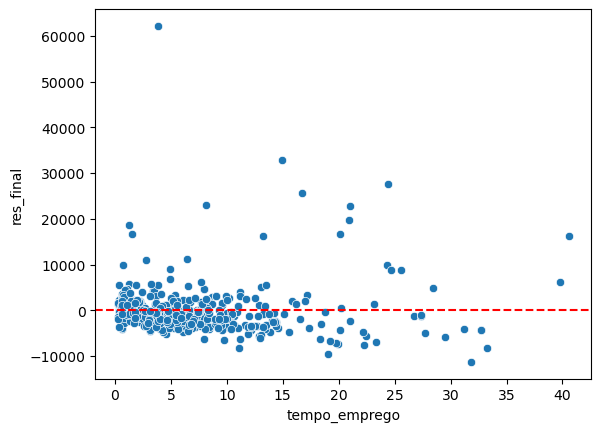

In [198]:
sns.scatterplot(x='tempo_emprego', y='res_final', data=renda)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='sexo', ylabel='res_final'>

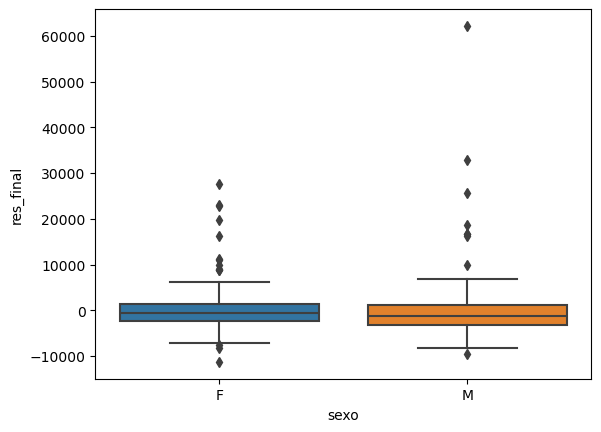

In [199]:
sns.boxplot(x='sexo', y='res_final', data=renda)

<Axes: xlabel='posse_de_imovel', ylabel='res_final'>

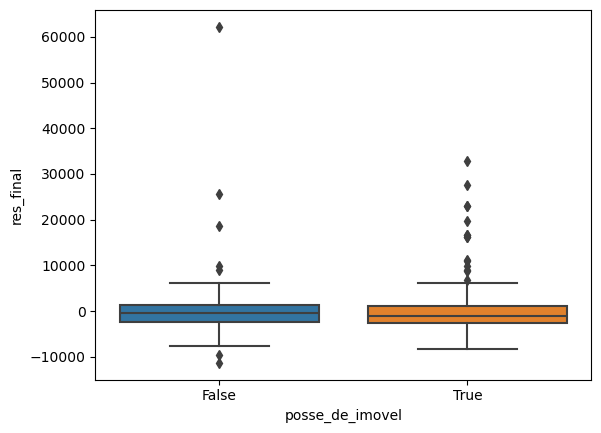

In [200]:
sns.boxplot(x='posse_de_imovel', y='res_final', data=renda)

<Axes: xlabel='posse_de_veiculo', ylabel='res_final'>

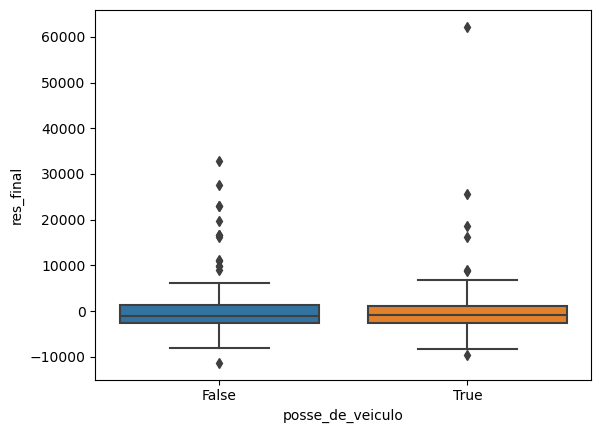

In [201]:
sns.boxplot(x='posse_de_veiculo', y='res_final', data=renda)

<Axes: xlabel='tipo_renda', ylabel='res_final'>

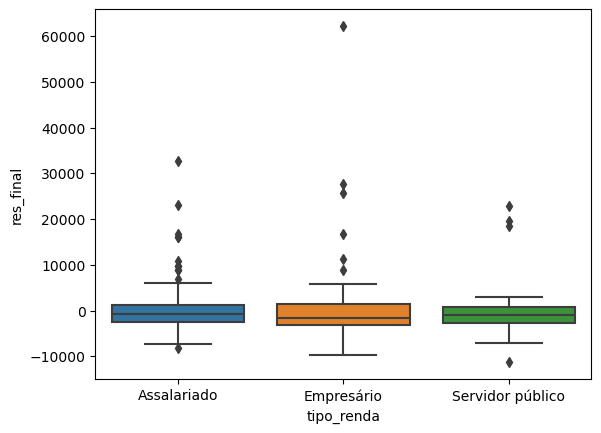

In [202]:
sns.boxplot(x='tipo_renda', y='res_final', data=renda)

<Axes: xlabel='educacao', ylabel='res_final'>

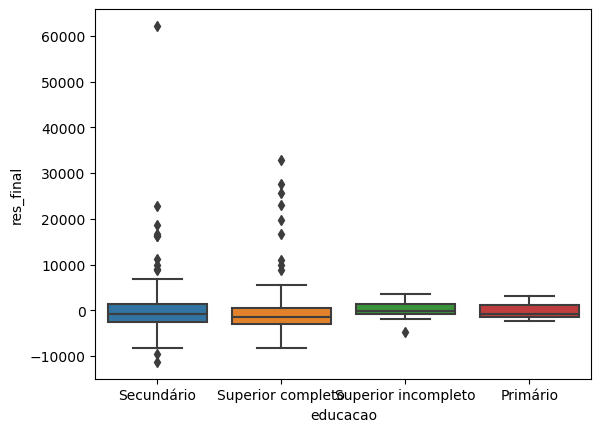

In [203]:
sns.boxplot(x='educacao', y='res_final', data=renda)

<Axes: xlabel='estado_civil', ylabel='res_final'>

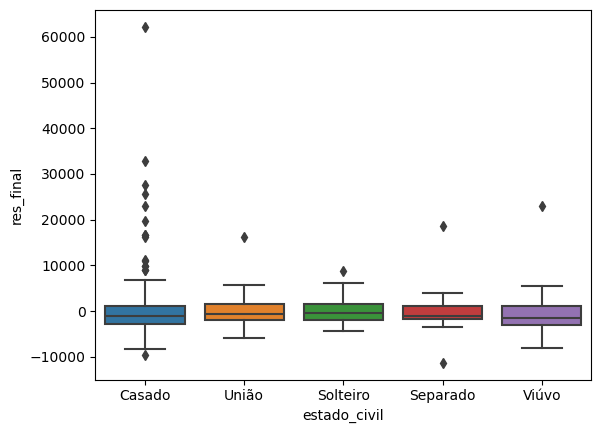

In [204]:
sns.boxplot(x='estado_civil', y='res_final', data=renda)

<Axes: xlabel='tipo_residencia', ylabel='res_final'>

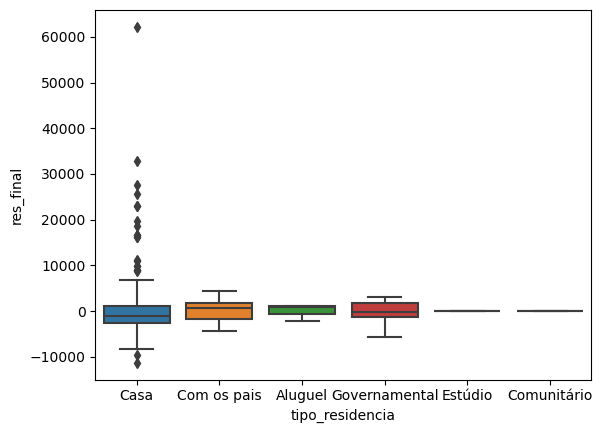

In [205]:
sns.boxplot(x='tipo_residencia', y='res_final', data=renda)

<h4 style="color:green">os boxplots do resíduo indicam alguns outliers em variáveis específicas, o último ajuste realizado, com a remoção de algumas variáveis, não parece ter surtido muito efeito. Precisaríamos realizar um tratamento específico a depender do caso de cada variável se quisermos melhorar o modelo</h4>